In [1]:
# Initial imports
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read each file as data frames.
practicetweets_df = pd.read_csv("../Cleaning_PseudoCode/Resources/PracticeTweets.csv")

In [3]:
practicetweets_df.head()

,text,target
0,"['followfriday', 'top', 'engag', 'member', 'co...",1.0
1,"['hey', 'jame', 'odd', ':/', 'pleas', 'call', ...",1.0
2,"['listen', 'last', 'night', ':)', 'bleed', 'am...",1.0
3,"['congrat', ':)']",1.0
4,"['yeaaah', 'yipppi', 'accnt', 'verifi', 'rqst'...",1.0


In [4]:
#Seperating features and labels 
X = practicetweets_df['text']
y = practicetweets_df['target']

In [5]:
y.unique()

array([1., 0.])

In [6]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 1000)

In [7]:
#Choose a method for vectorizing TF-IDF vectorizer OR Bag of Words OR Ngrams 

#Fit the TF-IDF Vectorizer 
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  38124


In [8]:
#TF-IDF Vectorizer 
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [9]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [10]:
#Bernoulli Naive Bayes 
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       774
         1.0       0.77      0.71      0.74       726

    accuracy                           0.76      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.76      0.76      0.76      1500



In [11]:
#Bernoulli Naive Bayes 
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
practice_test = BNBmodel.predict(X_train)

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       774
         1.0       0.77      0.71      0.74       726

    accuracy                           0.76      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.76      0.76      0.76      1500



Text(0.5, 1.0, 'Confusion Matrix')

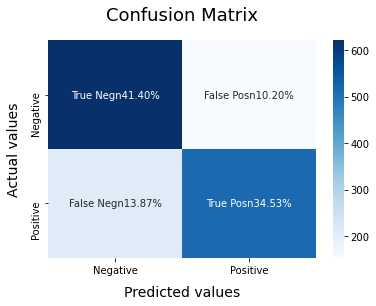

In [12]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [13]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       774
         1.0       0.75      0.74      0.74       726

    accuracy                           0.75      1500
   macro avg       0.75      0.75      0.75      1500
weighted avg       0.75      0.75      0.75      1500



In [14]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       774
         1.0       0.76      0.75      0.76       726

    accuracy                           0.76      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.76      0.76      0.76      1500

